# Nguyen Duc Quang - 11206700

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

## Exercise 2-3

In [2]:
iris = datasets.load_iris()

In [3]:
data = iris.data 
target = iris.target

In [4]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
data.shape

(150, 4)

Step 1 : Generate a Covariance matrix

In [6]:
df_matrix = np.asmatrix(data)
print(df_matrix.shape)

(150, 4)


In [7]:
covar_matrix = np.cov(df_matrix.T)
print(covar_matrix.shape)

(4, 4)


=> covariance matrix will be of 4*4 dimension

Step 2 : Compute eigen values and eigen vectors

In [8]:
eig_val, eig_vec = np.linalg.eig(covar_matrix)

In [9]:
print(eig_val)

[4.22824171 0.24267075 0.0782095  0.02383509]


In [10]:
print(eig_vec)

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


Step 3 : Select top k eigen values and corresponding eigen vectors

In [11]:
top2eig = eig_vec[:,0:2]
top2eig

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

Step 4: Transform data

In [12]:
new_data = data.dot(top2eig) 

In [13]:
print(new_data.shape)
new_data

(150, 2)


array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709],
       [ 3.2215055 , -6.06828303],
       [ 2.68182738, -5.23749119],
       [ 2.87622016, -5.49033754],
       [ 2.6159824 , -4.74864082],
       [ 2.82960933, -5.21317833],
       [ 2.99541804, -5.97202148],
       [ 2.8896099 , -5.34168252],
       [ 2.71625587, -5.09184058],
       [ 2.27856139, -4.81555799],
       [ 2.85761474, -6.50571721],
       [ 3.1163261 , -6.66501491],
       [ 2.87883726, -6.13763209],
       [ 2.85406843, -5.63880172],
       [ 3.30254481, -6.19979162],
       [ 2.91437873, -5.84051289],
       [ 3.19210892, -5.71829851],
       [ 2.9586599 , -5.75994864],
       [ 2.28642572, -5.46042065],
       [ 3.19963195, -5.42566143],
       [ 3.14661108, -5.28967072],
       [ 2.99569623, -5.1809357 ],
       [ 3.03354506, -5.45790407],
       [ 2.94004523, -5.69467143],
       [ 2.86283042,

In [14]:
new_df = pd.DataFrame(np.hstack((new_data,np.array(target).reshape(-1,1))),columns=['1st_component','2nd_component','Species'])


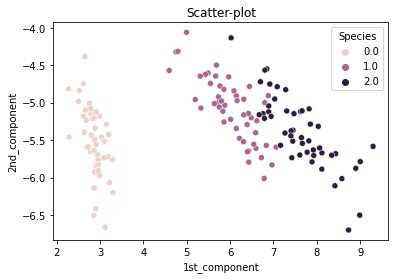

In [15]:
#plotting data
sns.scatterplot(new_df['1st_component'],new_df['2nd_component'],hue=new_df['Species'])
plt.title('Scatter-plot')
plt.show()

In [16]:
explained_var = []
for i in eig_val:
    explained_var.append(i/sum(eig_val) * 100)
c_sum = np.cumsum(explained_var)

Text(0, 0.5, 'cumulative explained variance')

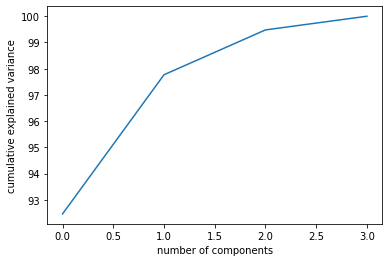

In [17]:
plt.plot(np.cumsum(explained_var))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## Exercise 4

In [18]:
pca  = PCA(n_components=2)
#here data is scaled data that we did earlier using standard scalar
pca_components = pca.fit_transform(data)
print(pca_components.shape)

(150, 2)


In [19]:
new_df_pca = pd.DataFrame(np.hstack((pca_components,np.array(target).reshape(-1,1))),columns=['1st_component','2nd_component','Species'])

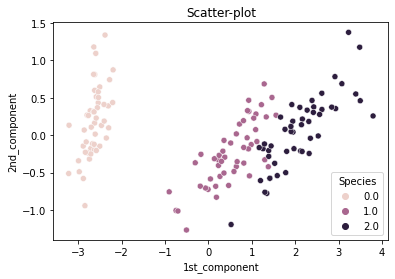

In [20]:
sns.scatterplot(new_df_pca['1st_component'],new_df_pca['2nd_component'],hue=new_df_pca['Species'])
plt.title('Scatter-plot')
plt.show()

We can see that both of them give almost similar results.